# Disaster Tweet Analyzing

### Importing

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\yokes\Downloads\train.csv")

In [3]:
df1=pd.read_csv(r"C:\Users\yokes\Downloads\test.csv")

### Preprocessing & Data Cleaning

In [4]:
df=df.drop(['keyword','location','id'],axis=1)

In [5]:
df1=df1.drop(['keyword','location','id'],axis=1)

In [6]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df1.head() 

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
URL_PATTERN = '((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*'
all_stopwords = stopwords.words('english')

def process_text(text):
    # remove stopwords
    remove_stop = ' '.join([word for word in text.split() if word not in all_stopwords])
    #remove url
    remove_url = re.sub(URL_PATTERN, '', remove_stop)
    #remove punctuation
    remove_punc = re.sub(r'[^\w\s]', '', remove_url)
    
    return remove_punc.lower()

### Tokenization

In [10]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

df['tokens'] = [tokenizer.tokenize(item) for item in df.text]
df1['tokens'] = [tokenizer.tokenize(item) for item in df1.text]

### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_item(item):
    new_item = []
    for x in item:
        x = lemmatizer.lemmatize(x)
        new_item.append(x)
    return " ".join(new_item)

df['tokens'] = [lemmatize_item(item) for item in df.tokens]
df1['tokens'] = [lemmatize_item(item) for item in df1.tokens]

### Vectorization

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


X = vectorizer.fit_transform(df.text).toarray()
y = df['target']

In [13]:
#Checking

df.isnull().sum()

text      0
target    0
tokens    0
dtype: int64

### Model Building

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression
 
lor = LogisticRegression(penalty='l2',C=10.0)

lor.fit(X_train,y_train)

y_pred = lor.predict(X_test)

C:\Users\yokes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

### EDA

<AxesSubplot:xlabel='target', ylabel='count'>

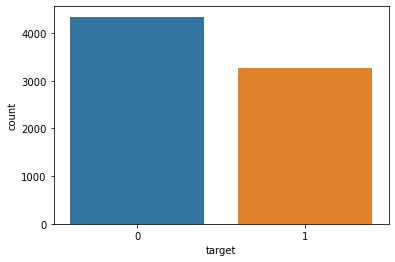

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target',data=df)

### Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[765, 121],
       [173, 464]], dtype=int64)

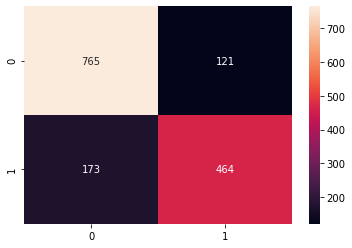

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()

### Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       886
           1       0.79      0.73      0.76       637

    accuracy                           0.81      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

